In [14]:
%matplotlib inline

import json
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
tweets_data_path = '/Users/Simin/Documents/TwitterAPI/twitter_stream.txt'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [16]:
print len(tweets_data)

31


In [28]:
tweets = pd.DataFrame()

In [29]:
tweets['created_at'] = map(lambda tweet: tweet['created_at'], tweets_data)
tweets['id_str'] = map(lambda tweet: tweet['id_str'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets['in_reply_to_status_id_str'] = map(lambda tweet: tweet['in_reply_to_status_id_str'], tweets_data)
#tweets['quoted_status_id_str'] = map(lambda tweet: tweet['quoted_status_id_str'] if  tweet['quoted_status_id_str']!= None else None, tweets_data)
tweets['retweet_count'] = map(lambda tweet: tweet['retweet_count'], tweets_data)
tweets['retweeted'] = map(lambda tweet: tweet['retweeted'], tweets_data)
tweets['favorite_count'] = map(lambda tweet: tweet['favorite_count'], tweets_data)
tweets['favorited'] = map(lambda tweet: tweet['favorited'], tweets_data)
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)


In [36]:
# parse time from string to datetime
from datetime import datetime
from datetime import date

date_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

In [37]:
print date_object

2005-06-01 13:33:00


In [42]:
print date_object> datetime(2005,6,1,1,1,1)
print datetime(2005,6,1,1,1,1).ctime()

True
Wed Jun  1 01:01:01 2005


In [30]:
print tweets

                        created_at              id_str lang country  \
0   Tue Sep 13 17:24:26 +0000 2016  775746975459340288   en    None   
1   Tue Sep 13 17:24:30 +0000 2016  775746991318073344   ru    None   
2   Tue Sep 13 17:24:31 +0000 2016  775746999333318656   en    None   
3   Tue Sep 13 17:23:20 +0000 2016  775746700682100736   en    None   
4   Tue Sep 13 17:24:32 +0000 2016  775747002583945216   it    None   
5   Tue Sep 13 17:24:34 +0000 2016  775747011303858176   en    None   
6   Tue Sep 13 17:24:36 +0000 2016  775747016831954944   fr    None   
7   Tue Sep 13 17:24:36 +0000 2016  775747018731900928   en    None   
8   Tue Sep 13 17:24:39 +0000 2016  775747028886315009   en    None   
9   Tue Sep 13 17:24:39 +0000 2016  775747029683273728   es    None   
10  Tue Sep 13 17:24:39 +0000 2016  775747031423942656   en    None   
11  Tue Sep 13 17:24:40 +0000 2016  775747035194658816   en    None   
12  Tue Sep 13 17:24:41 +0000 2016  775747038625628164   en    None   
13  Tu

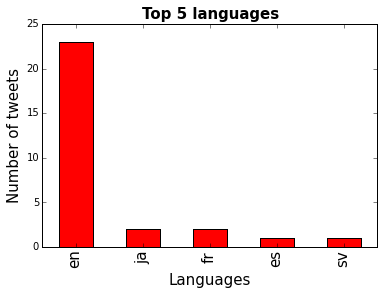

In [19]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')